# EDA

## Preguntas y conocimiento de data

### Pasos previos
* Cuantas columnas se manejan?
* Eliminar columnas inutiles
* Transformar columnas, columnas True/False, one hot encoding?
* Separar la data entre Attrition y no-Attrition
* Calcular media de horario de entrada

### Preguntas
* cuantos empleados tiene la compañia?
* Describir la edad de los empleados
* Describir la distancia hacia el trabajo
* Describir salario mensual y aumento salarial del ultimo año
* Describir salario mensual vs educacion
* Describir salario mensual vs nivel de trabajo
* Describir la media de tiempo en la compañia
* Graficar calidad del ambiente, desempeño y balance vida-trabajo


In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [124]:
employee_survey_df = pd.read_csv('data/employee_survey_data.csv')
general_df = pd.read_csv('data/general_data.csv')
in_time_df = pd.read_csv('data/in_time.csv')
out_time_df = pd.read_csv('data/out_time.csv')
manager_survey_df = pd.read_csv('data/manager_survey_data.csv')

In [125]:
survey_df = pd.merge(manager_survey_df, employee_survey_df, how='left', on = 'EmployeeID')
g_df = pd.merge(general_df,survey_df,how='left',on='EmployeeID')
del survey_df
del general_df

In [126]:
from datetime import datetime
import math
def average_hour_stats(data):
    dateAvg = []
    skipDayCount = 0
    for date in data:
        if type(date) == str:

            date = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
            date = date.hour*3600 + date.minute*60 + date.second
            dateAvg.append(date)
        elif np.isnan(date):
            skipDayCount+=1
            
    dateAvg = np.array(dateAvg)
    dateAvg = dateAvg.mean()
    
    return math.floor(dateAvg), skipDayCount

    
    

In [127]:
schedule_df = pd.DataFrame(columns=['EmployeeID','AvgTimeInSec','AvgTimeOutSec','AwayFromOfficeDays'])

In [128]:
for i in range(len(g_df.index)):
    avg_in, missing_in = average_hour_stats(in_time_df.iloc[i,1:])
    avg_out, missing_out = average_hour_stats(out_time_df.iloc[i,1:])
    row_df = pd.DataFrame([[i,avg_in,avg_out,max(missing_in,missing_out)]], columns=['EmployeeID','AvgTimeInSec','AvgTimeOutSec','AwayFromOfficeDays'])
    schedule_df = pd.concat([schedule_df,row_df], ignore_index=True)


In [129]:
schedule_df.head()


,EmployeeID,AvgTimeInSec,AvgTimeOutSec,AwayFromOfficeDays
0,0,36005,62550,29
1,1,35957,63745,25
2,2,36090,61337,19
3,3,35934,61831,26
4,4,35994,64816,16


In [130]:
g_df = pd.merge(g_df,schedule_df,how='left',on='EmployeeID')

In [131]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [132]:
g_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


¿Como si visualiza la edad de los empleados?

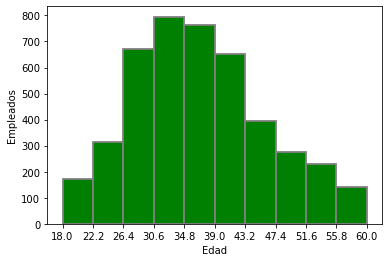

In [133]:
num_bins = 10
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(g_df.Age, facecolor='green', edgecolor='gray', linewidth=1.8)
ax.set_xticks(bins)
ax.set_xlabel('Edad')
ax.set_ylabel('Empleados')
plt.show()


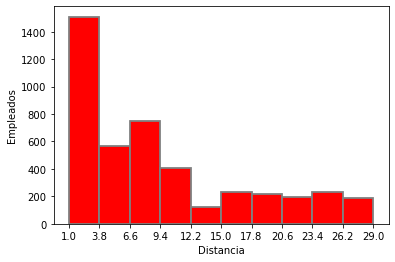

In [134]:
num_bins = 10
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(g_df.DistanceFromHome, facecolor='red', edgecolor='gray', linewidth=1.8)
ax.set_xticks(bins)
ax.set_xlabel('Distancia')
ax.set_ylabel('Empleados')
plt.show()

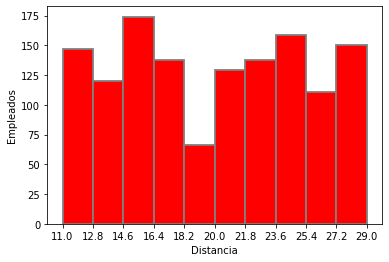

In [135]:
num_bins = 10
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(g_df[g_df.DistanceFromHome>10].DistanceFromHome, facecolor='red', edgecolor='gray', linewidth=1.8)
ax.set_xticks(bins)
ax.set_xlabel('Distancia')
ax.set_ylabel('Empleados')
plt.show()

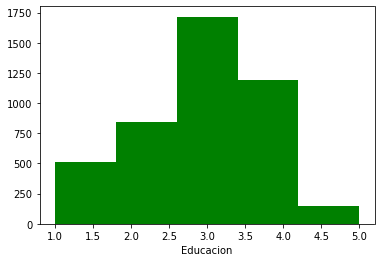

In [136]:

plt.hist(g_df.Education,bins=5, color = 'green')
plt.xlabel('Educacion')
plt.show()


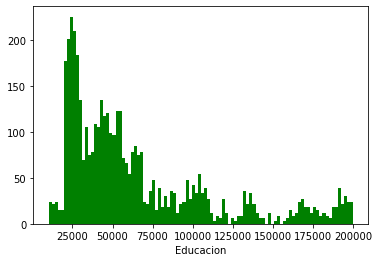

In [137]:
plt.hist(g_df.MonthlyIncome,bins=100, color = 'green')
plt.xlabel('Educacion')
plt.show()

In [138]:
g_df[g_df.MonthlyIncome<=25000].count()[0]

678

In [139]:
g_df[g_df.MonthlyIncome>=150000].count()[0]

399

In [140]:
g_df[(g_df.MonthlyIncome>=100000) & (g_df.MonthlyIncome<=150000)].count()[0]

444

<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='Education'>

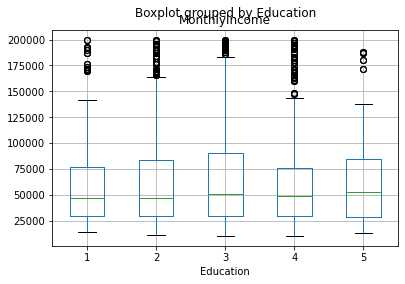

In [141]:
g_df.boxplot(column='MonthlyIncome',by='Education')


<AxesSubplot:title={'center':'MonthlyIncome'}, xlabel='JobLevel'>

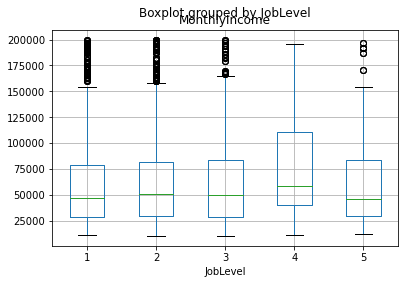

In [142]:
g_df.boxplot(column='MonthlyIncome',by='JobLevel')

In [143]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [144]:
g_df.Over18.unique()

array(['Y'], dtype=object)

In [145]:
g_df.drop('Over18', inplace=True, axis=1)

In [146]:
g_df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [147]:
g_df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [148]:
g_df.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [149]:
g_df['Attrition'] = g_df['Attrition'].map(
                   {'Yes':True ,'No':False})

In [150]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   bool   
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [151]:
exit_df = g_df[g_df.Attrition==True].groupby('Department').EmployeeID.count()

In [152]:
all_df = g_df.groupby('Department').EmployeeID.count()

In [153]:
#obtener totales
exit_df = exit_df/all_df


In [154]:
exit_df*100

Department
Human Resources           30.158730
Research & Development    15.712799
Sales                     15.022422
Name: EmployeeID, dtype: float64

In [155]:
#verificar porque HR tiene una rotacion del 30%
del exit_df
del all_df

In [156]:
g_df[g_df.Attrition==True].describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,711.000000,711.000000,711.000000,711.0,711.000000,711.000000,707.000000,711.000000,711.0,711.000000,709.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,706.000000,710.000000,707.000000
mean,33.607595,9.012658,2.877637,1.0,2.037975,61682.616034,2.936351,15.481013,8.0,0.780591,8.255289,2.654008,5.130802,1.945148,2.852321,2.704641,3.172996,2.468839,2.470423,2.660537
std,9.675693,7.772368,1.014233,0.0,1.057485,44792.067695,2.678774,3.775289,0.0,0.858899,7.164018,1.154834,5.941598,3.148633,3.138918,0.761739,0.378510,1.166807,1.115906,0.816377
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,28.000000,2.000000,2.000000,1.0,1.000000,28440.000000,1.000000,12.000000,8.0,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,2.000000
50%,32.000000,7.000000,3.000000,1.0,2.000000,49080.000000,1.000000,14.000000,8.0,1.000000,7.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,15.000000,4.000000,1.0,2.000000,71040.000000,5.000000,18.000000,8.0,1.000000,10.000000,3.000000,7.000000,2.000000,5.000000,3.000000,3.000000,4.000000,3.000000,3.000000
max,58.000000,29.000000,5.000000,1.0,5.000000,198590.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,14.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [157]:
g_df.drop('EmployeeCount', inplace=True, axis=1)

In [158]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   bool   
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   object 
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [159]:
g_df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [160]:
g_a_df = g_df[g_df.Attrition==True]
g_af_df = g_df[g_df.Attrition==False]

In [161]:
g_a_df.count()[0]*100/g_af_df.count()[0]

19.221411192214113